In [110]:
# Importing packages
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import main

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [111]:
### Definining name of analysis ###
name = 'dragbuild_results'

figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_04_restructure/Figures/"
# figure_path = '../Figures/'+name+'/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)


In [112]:
# Importing Drag Build Ups
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar_Fixed.pkl")

In [113]:
from matplotlib.patches import Rectangle
    
def zoom_outside(srcax, roi, dstax, color="red", linewidth=2, roiKwargs={}, arrowKwargs={}):
    '''Create a zoomed subplot outside the original subplot
    
    srcax: matplotlib.axes
        Source axis where locates the original chart
    dstax: matplotlib.axes
        Destination axis in which the zoomed chart will be plotted
    roi: list
        Region Of Interest is a rectangle defined by [xmin, ymin, xmax, ymax],
        all coordinates are expressed in the coordinate system of data
    roiKwargs: dict (optional)
        Properties for matplotlib.patches.Rectangle given by keywords
    arrowKwargs: dict (optional)
        Properties used to draw a FancyArrowPatch arrow in annotation
    '''
    roiKwargs = dict([("fill", False), ("linestyle", "dashed"),
                      ("color", color), ("linewidth", linewidth)]
                     + list(roiKwargs.items()))
    arrowKwargs = dict([("arrowstyle", "-"), ("color", color),
                        ("linewidth", linewidth)]
                       + list(arrowKwargs.items()))
    # draw a rectangle on original chart
    srcax.add_patch(Rectangle([roi[0], roi[1]], roi[2]-roi[0], roi[3]-roi[1], 
                            **roiKwargs))
    # get coordinates of corners
    srcCorners = [[roi[0], roi[1]], [roi[0], roi[3]],
                  [roi[2], roi[1]], [roi[2], roi[3]]]
    dstCorners = dstax.get_position().corners()
    srcBB = srcax.get_position()
    dstBB = dstax.get_position()
    # find corners to be linked
    if srcBB.max[0] <= dstBB.min[0]: # right side
        if srcBB.min[1] < dstBB.min[1]: # upper
            corners = [1, 2]
        elif srcBB.min[1] == dstBB.min[1]: # middle
            corners = [0, 1]
        else:
            corners = [0, 3] # lower
    elif srcBB.min[0] >= dstBB.max[0]: # left side
        if srcBB.min[1] < dstBB.min[1]:  # upper
           corners = [0, 3]
        elif srcBB.min[1] == dstBB.min[1]: # middle
            corners = [2, 3]
        else:
            corners = [1, 2]  # lower
    elif srcBB.min[0] == dstBB.min[0]: # top side or bottom side
        if srcBB.min[1] < dstBB.min[1]:  # upper
            corners = [0, 2]
        else:
            corners = [1, 3] # lower
    else:
        RuntimeWarning("Cannot find a proper way to link the original chart to "
                       "the zoomed chart! The lines between the region of "
                       "interest and the zoomed chart wiil not be plotted.")
        return
    # plot 2 lines to link the region of interest and the zoomed chart
    for k in range(2):
        srcax.annotate('', xy=srcCorners[corners[k]], xycoords="data",
            xytext=dstCorners[corners[k]], textcoords="figure fraction",
            arrowprops=arrowKwargs)

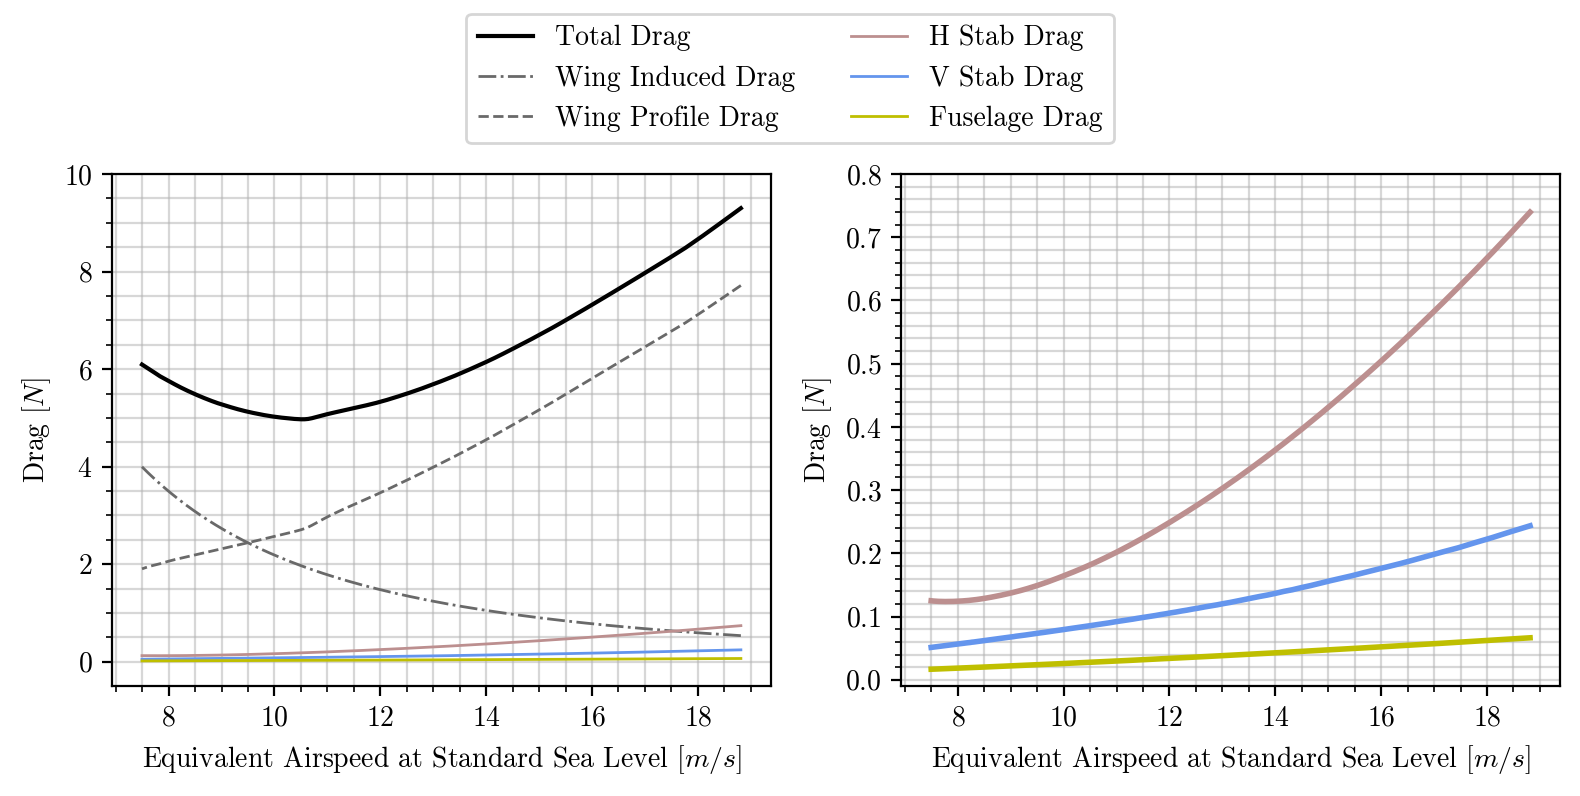

In [114]:
# Generating Basic Line Charts

createv_laminar_dbu = plt.figure(dpi=200, figsize=(8,4))
# ax0 = plt.subplot2grid((3,2), (0,0), colspan=3)
# ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
# ax2 = plt.subplot2grid((3,2), (0,0), colspan=2)

# ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1 = plt.subplot2grid((5, 2), (1, 0), rowspan=4)
ax2 = plt.subplot2grid((5, 2), (1, 1), rowspan=4)
# ax5 = plt.subplot2grid((3, 2), (2, 1))

createv_laminar_dbu.subplots_adjust(top=0.5)

ax1.plot(build_laminar.Airspeed, build_laminar["Total Drag"],label="Total Drag", marker='', linestyle='solid', color='black')
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Induced Drag"], label="Wing Induced Drag", marker='', linestyle='dashdot', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Profile Drag"], label="Wing Profile Drag", marker='', linestyle='dashed', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], label="H Stab Drag", marker='', linestyle='solid', color='rosybrown', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], label="V Stab Drag", marker='', linestyle='solid', color='cornflowerblue', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], label="Fuselage Drag", marker='', linestyle='solid', color='y', linewidth=1)

ax1.set_ylim([-0.5,10])
ax1.set_ylabel("Drag [$N$]")
ax1.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

ax2.set_ylim([-0.01, 0.8])
ax2.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], marker='', linestyle='solid', color='rosybrown', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], marker='', linestyle='solid', color='cornflowerblue', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], marker='', linestyle='solid', color='y', linewidth=2)
ax2.set_ylabel("Drag [$N$]")
ax2.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# zoom_outside(srcax=ax1, roi=[20, 0, 7, 2], dstax=ax2, color="red", linewidth=2, )

createv_laminar_dbu.legend(loc=9, ncol=2)
createv_laminar_dbu.tight_layout()

plt.show()
main.save_figure(createv_laminar_dbu, f'{createv_laminar_dbu=}'.split('=')[0], figure_path, overwrite=True)

In [115]:
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent_Fixed.pkl")

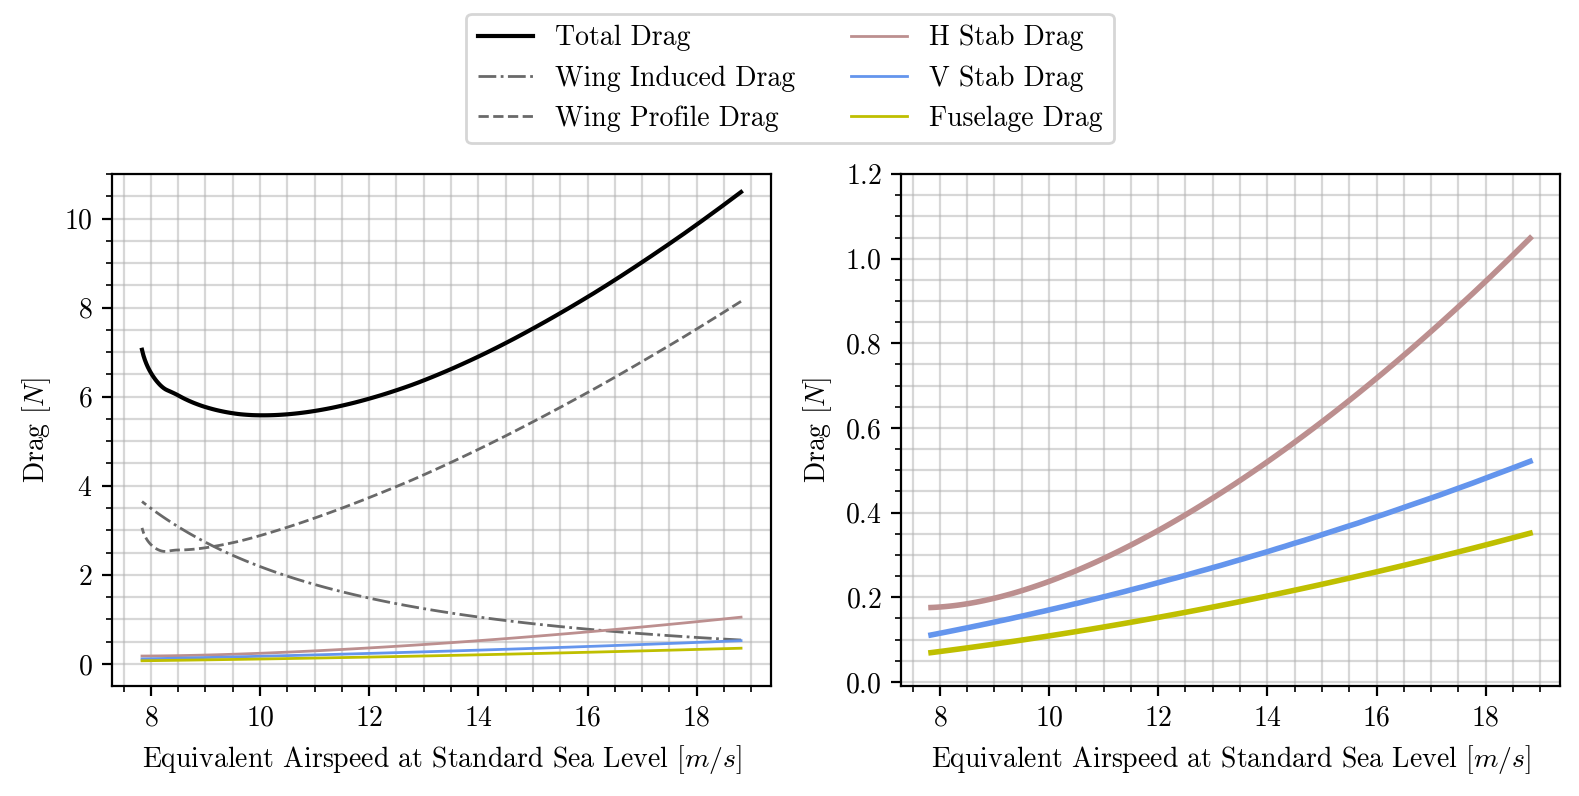

In [116]:
# Generating Basic Line Charts

createv_turbulent_dbu = plt.figure(dpi=200, figsize=(8,4))
# ax0 = plt.subplot2grid((3,2), (0,0), colspan=3)
# ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
# ax2 = plt.subplot2grid((3,2), (0,0), colspan=2)

# ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1 = plt.subplot2grid((5, 2), (1, 0), rowspan=4)
ax2 = plt.subplot2grid((5, 2), (1, 1), rowspan=4)
# ax5 = plt.subplot2grid((3, 2), (2, 1))

createv_turbulent_dbu.subplots_adjust(top=0.5)

ax1.plot(build_laminar.Airspeed, build_laminar["Total Drag"],label="Total Drag", marker='', linestyle='solid', color='black')
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Induced Drag"], label="Wing Induced Drag", marker='', linestyle='dashdot', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Profile Drag"], label="Wing Profile Drag", marker='', linestyle='dashed', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], label="H Stab Drag", marker='', linestyle='solid', color='rosybrown', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], label="V Stab Drag", marker='', linestyle='solid', color='cornflowerblue', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], label="Fuselage Drag", marker='', linestyle='solid', color='y', linewidth=1)

ax1.set_ylim([-0.5,11])
ax1.set_ylabel("Drag [$N$]")
ax1.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

ax2.set_ylim([-0.01, 1.2])
ax2.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], marker='', linestyle='solid', color='rosybrown', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], marker='', linestyle='solid', color='cornflowerblue', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], marker='', linestyle='solid', color='y', linewidth=2)
ax2.set_ylabel("Drag [$N$]")
ax2.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# zoom_outside(srcax=ax1, roi=[20, 0, 7, 2], dstax=ax2, color="red", linewidth=2, )

createv_turbulent_dbu.legend(loc=9, ncol=2)
createv_turbulent_dbu.tight_layout()

plt.show()
main.save_figure(createv_turbulent_dbu, f'{createv_turbulent_dbu=}'.split('=')[0], figure_path, overwrite=True)

In [117]:
build_laminar = pd.read_pickle("../../DragBuilds/Linus_DragBuildLaminar_Fixed.pkl")

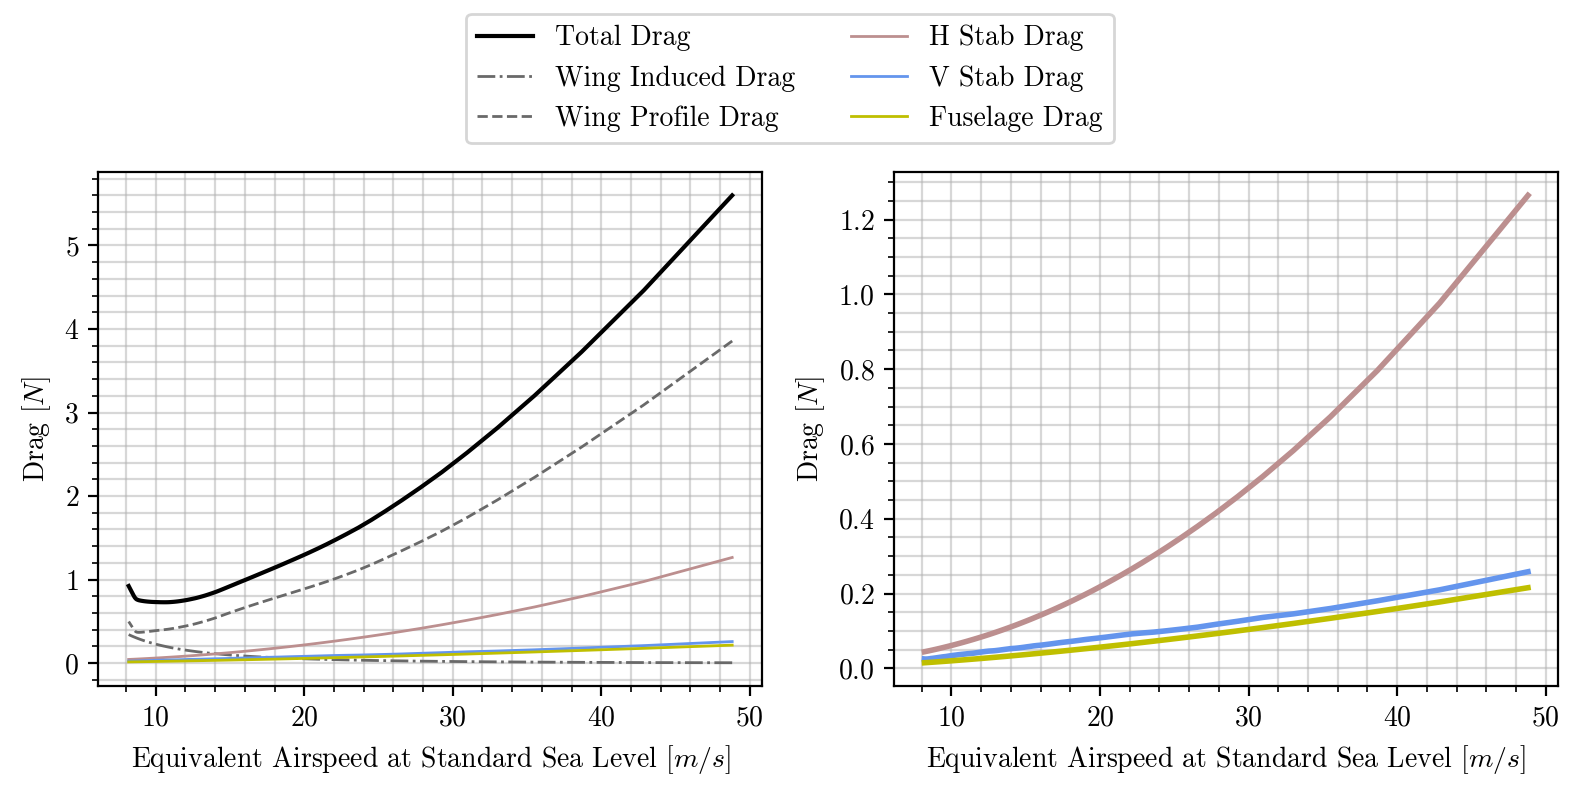

In [118]:
# Generating Basic Line Charts

linus_laminar_dbu = plt.figure(dpi=200, figsize=(8,4))
# ax0 = plt.subplot2grid((3,2), (0,0), colspan=3)
# ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
# ax2 = plt.subplot2grid((3,2), (0,0), colspan=2)

# ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1 = plt.subplot2grid((5, 2), (1, 0), rowspan=4)
ax2 = plt.subplot2grid((5, 2), (1, 1), rowspan=4)
# ax5 = plt.subplot2grid((3, 2), (2, 1))

linus_laminar_dbu.subplots_adjust(top=0.5)

ax1.plot(build_laminar.Airspeed, build_laminar["Total Drag"],label="Total Drag", marker='', linestyle='solid', color='black')
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Induced Drag"], label="Wing Induced Drag", marker='', linestyle='dashdot', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Profile Drag"], label="Wing Profile Drag", marker='', linestyle='dashed', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], label="H Stab Drag", marker='', linestyle='solid', color='rosybrown', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], label="V Stab Drag", marker='', linestyle='solid', color='cornflowerblue', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], label="Fuselage Drag", marker='', linestyle='solid', color='y', linewidth=1)

# ax1.set_ylim([-0.5,11])
ax1.set_ylabel("Drag [$N$]")
ax1.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# ax2.set_ylim([-0.01, 1.2])
ax2.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], marker='', linestyle='solid', color='rosybrown', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], marker='', linestyle='solid', color='cornflowerblue', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], marker='', linestyle='solid', color='y', linewidth=2)
ax2.set_ylabel("Drag [$N$]")
ax2.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# zoom_outside(srcax=ax1, roi=[20, 0, 7, 2], dstax=ax2, color="red", linewidth=2, )

linus_laminar_dbu.legend(loc=9, ncol=2)
linus_laminar_dbu.tight_layout()

plt.show()
main.save_figure(linus_laminar_dbu, f'{linus_laminar_dbu=}'.split('=')[0], figure_path, overwrite=True)

In [119]:
build_laminar = pd.read_pickle("../../DragBuilds/Linus_DragBuildTurbulent_Fixed.pkl")

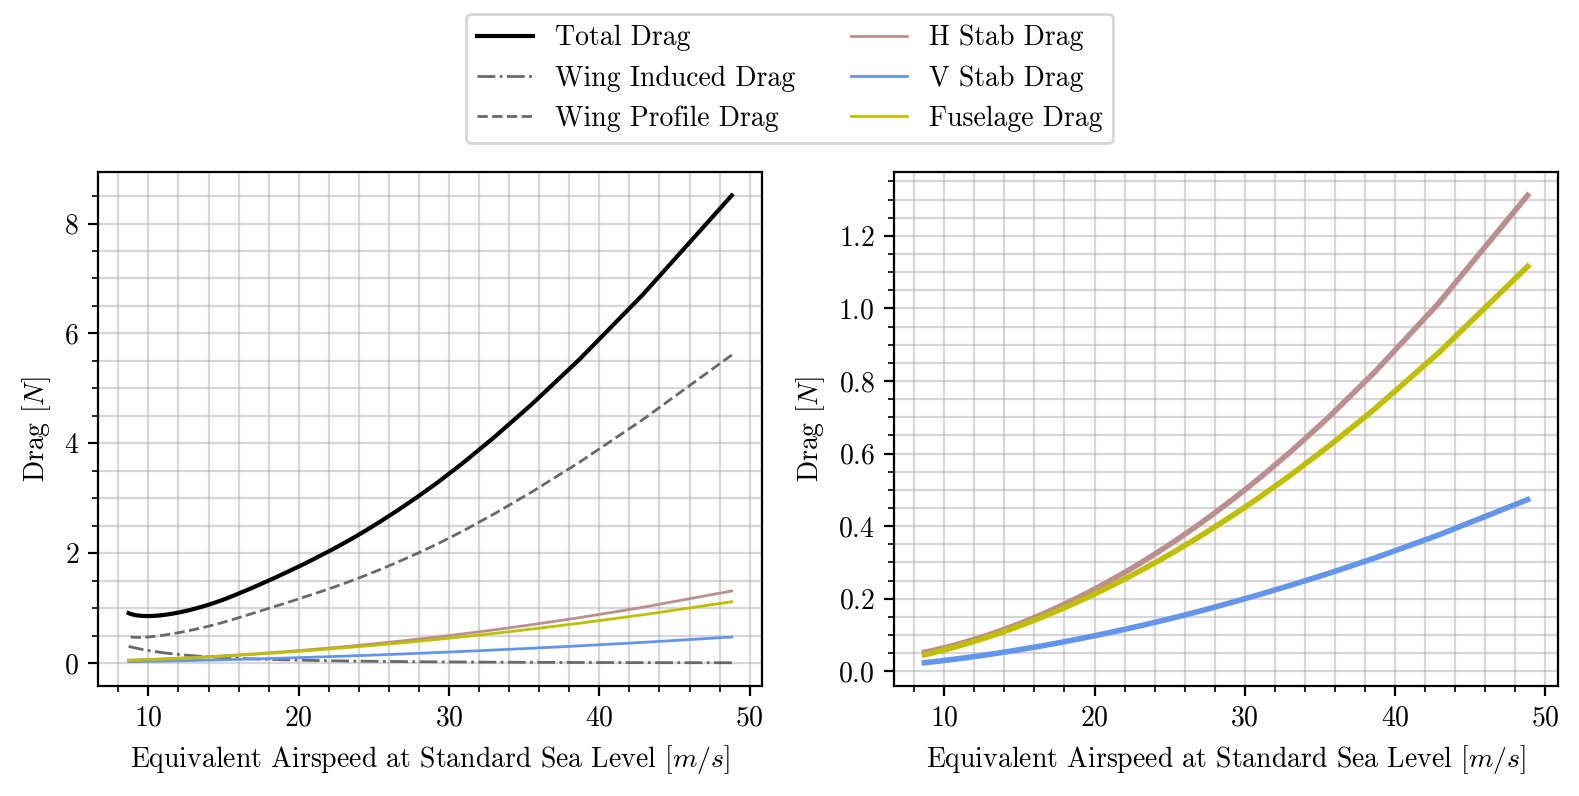

In [120]:
# Generating Basic Line Charts

linus_turbulent_dbu = plt.figure(dpi=200, figsize=(8,4))
# ax0 = plt.subplot2grid((3,2), (0,0), colspan=3)
# ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
# ax2 = plt.subplot2grid((3,2), (0,0), colspan=2)

# ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax1 = plt.subplot2grid((5, 2), (1, 0), rowspan=4)
ax2 = plt.subplot2grid((5, 2), (1, 1), rowspan=4)
# ax5 = plt.subplot2grid((3, 2), (2, 1))

linus_turbulent_dbu.subplots_adjust(top=0.5)

ax1.plot(build_laminar.Airspeed, build_laminar["Total Drag"],label="Total Drag", marker='', linestyle='solid', color='black')
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Induced Drag"], label="Wing Induced Drag", marker='', linestyle='dashdot', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Wing Profile Drag"], label="Wing Profile Drag", marker='', linestyle='dashed', color='dimgrey', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], label="H Stab Drag", marker='', linestyle='solid', color='rosybrown', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], label="V Stab Drag", marker='', linestyle='solid', color='cornflowerblue', linewidth=1)
ax1.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], label="Fuselage Drag", marker='', linestyle='solid', color='y', linewidth=1)

# ax1.set_ylim([-0.5,11])
ax1.set_ylabel("Drag [$N$]")
ax1.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# ax2.set_ylim([-0.01, 1.2])
ax2.plot(build_laminar.Airspeed, build_laminar["H Stab Drag"], marker='', linestyle='solid', color='rosybrown', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["V Stab Drag"], marker='', linestyle='solid', color='cornflowerblue', linewidth=2)
ax2.plot(build_laminar.Airspeed, build_laminar["Fuselage Drag"], marker='', linestyle='solid', color='y', linewidth=2)
ax2.set_ylabel("Drag [$N$]")
ax2.set_xlabel("Equivalent Airspeed at Standard Sea Level [$m/s$]")

# zoom_outside(srcax=ax1, roi=[20, 0, 7, 2], dstax=ax2, color="red", linewidth=2, )

linus_turbulent_dbu.legend(loc=9, ncol=2)
linus_turbulent_dbu.tight_layout()

plt.show()
main.save_figure(linus_turbulent_dbu, f'{linus_turbulent_dbu=}'.split('=')[0], figure_path, overwrite=True)